In [365]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

pd.set_option('display.max_columns', None)

X é o data
y é o rótulo

In [366]:
dataset = pd.read_csv("../../.data/raw_data/Music_Info.csv")
dataset.head(5)

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,0.892,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,0.664,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [367]:
dataset.isna().sum()

track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                    1127
genre                  28335
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
dtype: int64

In [368]:
dataset.dropna(inplace=True, axis=0)
dataset.isna().sum()

track_id               0
name                   0
artist                 0
spotify_preview_url    0
spotify_id             0
tags                   0
genre                  0
year                   0
duration_ms            0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
dtype: int64

In [370]:
infos = dataset.iloc[:, np.r_[1,2, 7:dataset.shape[1]]]
infos.head()

,name,artist,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2,Come as You Are,Nirvana,1991,218920,0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
4,Creep,Radiohead,2008,238640,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4
8,The Scientist,Coldplay,2007,311014,0.566,0.429,5,-7.826,1,0.0242,0.715000,0.000014,0.1200,0.173,146.365,4
10,Under the Bridge,Red Hot Chili Peppers,2003,265506,0.554,0.490,4,-8.046,1,0.0457,0.016800,0.000534,0.1360,0.513,84.275,4
12,Feel Good Inc.,Gorillaz,2010,223106,0.809,0.720,6,-7.776,1,0.1360,0.033700,0.001410,0.8260,0.832,138.556,4


In [371]:
LabelEncoderX = LabelEncoder()
infos['artist_id'] = LabelEncoderX.fit_transform(infos.iloc[:,1])
infos['name_id'] = LabelEncoderX.fit_transform(infos.iloc[:,0])
infos.head()

/tmp/ipykernel_5086/1863177753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infos['artist_id'] = LabelEncoderX.fit_transform(infos.iloc[:,1])
/tmp/ipykernel_5086/1863177753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infos['name_id'] = LabelEncoderX.fit_transform(infos.iloc[:,0])


,name,artist,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_id,name_id
2,Come as You Are,Nirvana,1991,218920,0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4,3101,3633
4,Creep,Radiohead,2008,238640,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4,3421,3882
8,The Scientist,Coldplay,2007,311014,0.566,0.429,5,-7.826,1,0.0242,0.715000,0.000014,0.1200,0.173,146.365,4,939,18776
10,Under the Bridge,Red Hot Chili Peppers,2003,265506,0.554,0.490,4,-8.046,1,0.0457,0.016800,0.000534,0.1360,0.513,84.275,4,3460,20051
12,Feel Good Inc.,Gorillaz,2010,223106,0.809,0.720,6,-7.776,1,0.1360,0.033700,0.001410,0.8260,0.832,138.556,4,1785,6011


In [372]:
tags_and_genres= dataset.iloc[:,[5,6]]
tags_and_genres.head(5)

,tags,genre
2,"rock, alternative, alternative_rock, 90s, grunge",RnB
4,"rock, alternative, indie, alternative_rock, in...",RnB
8,"rock, alternative, indie, pop, alternative_roc...",Rock
10,"rock, alternative, alternative_rock, 90s, funk",Pop
12,"rock, electronic, alternative, indie, pop, alt...",RnB


In [373]:
tags_and_genres['tags'].fillna('Unknown', inplace=True)
tags_and_genres['genre'].fillna('Unknown', inplace=True)
tags_and_genres.head(5)

/tmp/ipykernel_5086/3110209775.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tags_and_genres['tags'].fillna('Unknown', inplace=True)
/tmp/ipykernel_5086/3110209775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags_and_genres['tags'].fillna('Unknown', inplace=True)
/tmp/ipykernel_5086/3110209775.py:2: FutureWarning: A value is tryi

,tags,genre
2,"rock, alternative, alternative_rock, 90s, grunge",RnB
4,"rock, alternative, indie, alternative_rock, in...",RnB
8,"rock, alternative, indie, pop, alternative_roc...",Rock
10,"rock, alternative, alternative_rock, 90s, funk",Pop
12,"rock, electronic, alternative, indie, pop, alt...",RnB


In [374]:
tags_dummies = tags_and_genres['tags'].str.get_dummies(sep=', ')
tags_and_genres_normalized = pd.concat([tags_and_genres, tags_dummies], axis=1)
tags_and_genres_normalized.drop('tags', axis=1, inplace=True)
tags_and_genres_normalized.head(5)

,genre,00s,60s,70s,80s,90s,acoustic,alternative,alternative_rock,ambient,american,avant_garde,beautiful,black_metal,blues,blues_rock,british,britpop,chill,chillout,classic_rock,classical,country,cover,dance,dark_ambient,death_metal,doom_metal,downtempo,drum_and_bass,electro,electronic,emo,experimental,female_vocalists,folk,french,funk,german,gothic,gothic_metal,grindcore,grunge,guitar,hard_rock,hardcore,heavy_metal,hip_hop,house,idm,indie,indie_pop,indie_rock,industrial,instrumental,j_pop,japanese,jazz,lounge,love,male_vocalists,mellow,melodic_death_metal,metal,metalcore,new_age,new_wave,noise,nu_metal,oldies,piano,polish,pop,pop_rock,post_hardcore,post_punk,post_rock,power_metal,progressive_metal,progressive_rock,psychedelic,psychedelic_rock,punk,punk_rock,rap,reggae,rnb,rock,russian,screamo,singer_songwriter,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
2,RnB,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,RnB,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Rock,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Pop,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12,RnB,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [375]:
metadata = pd.concat([infos,tags_and_genres_normalized], axis=1)
metadata.head(5)

,name,artist,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_id,name_id,genre,00s,60s,70s,80s,90s,acoustic,alternative,alternative_rock,ambient,american,avant_garde,beautiful,black_metal,blues,blues_rock,british,britpop,chill,chillout,classic_rock,classical,country,cover,dance,dark_ambient,death_metal,doom_metal,downtempo,drum_and_bass,electro,electronic,emo,experimental,female_vocalists,folk,french,funk,german,gothic,gothic_metal,grindcore,grunge,guitar,hard_rock,hardcore,heavy_metal,hip_hop,house,idm,indie,indie_pop,indie_rock,industrial,instrumental,j_pop,japanese,jazz,lounge,love,male_vocalists,mellow,melodic_death_metal,metal,metalcore,new_age,new_wave,noise,nu_metal,oldies,piano,polish,pop,pop_rock,post_hardcore,post_punk,post_rock,power_metal,progressive_metal,progressive_rock,psychedelic,psychedelic_rock,punk,punk_rock,rap,reggae,rnb,rock,russian,screamo,singer_songwriter,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
2,Come as You Are,Nirvana,1991,218920,0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4,3101,3633,RnB,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Creep,Radiohead,2008,238640,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4,3421,3882,RnB,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,The Scientist,Coldplay,2007,311014,0.566,0.429,5,-7.826,1,0.0242,0.715000,0.000014,0.1200,0.173,146.365,4,939,18776,Rock,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Under the Bridge,Red Hot Chili Peppers,2003,265506,0.554,0.490,4,-8.046,1,0.0457,0.016800,0.000534,0.1360,0.513,84.275,4,3460,20051,Pop,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12,Feel Good Inc.,Gorillaz,2010,223106,0.809,0.720,6,-7.776,1,0.1360,0.033700,0.001410,0.8260,0.832,138.556,4,1785,6011,RnB,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [376]:
# metadata =dataset
# metadata = metadata.drop(columns=['track_id','spotify_preview_url','spotify_id'])

In [377]:
number_of_coll = enumerate(list(metadata.columns))
for n_coll in number_of_coll:
    print(n_coll)

(0, 'name')
(1, 'artist')
(2, 'year')
(3, 'duration_ms')
(4, 'danceability')
(5, 'energy')
(6, 'key')
(7, 'loudness')
(8, 'mode')
(9, 'speechiness')
(10, 'acousticness')
(11, 'instrumentalness')
(12, 'liveness')
(13, 'valence')
(14, 'tempo')
(15, 'time_signature')
(16, 'artist_id')
(17, 'name_id')
(18, 'genre')
(19, '00s')
(20, '60s')
(21, '70s')
(22, '80s')
(23, '90s')
(24, 'acoustic')
(25, 'alternative')
(26, 'alternative_rock')
(27, 'ambient')
(28, 'american')
(29, 'avant_garde')
(30, 'beautiful')
(31, 'black_metal')
(32, 'blues')
(33, 'blues_rock')
(34, 'british')
(35, 'britpop')
(36, 'chill')
(37, 'chillout')
(38, 'classic_rock')
(39, 'classical')
(40, 'country')
(41, 'cover')
(42, 'dance')
(43, 'dark_ambient')
(44, 'death_metal')
(45, 'doom_metal')
(46, 'downtempo')
(47, 'drum_and_bass')
(48, 'electro')
(49, 'electronic')
(50, 'emo')
(51, 'experimental')
(52, 'female_vocalists')
(53, 'folk')
(54, 'french')
(55, 'funk')
(56, 'german')
(57, 'gothic')
(58, 'gothic_metal')
(59, 'grin

In [378]:
# Definindo o TARGET e FEATURES
# Defina suas características (features) e target
X = metadata.drop(['genre','name','artist'], axis=1) # Features
# X = metadata.drop(['genre'], axis=1) # Features
y = LabelEncoderX.fit_transform(metadata['genre'])  # Target
# y = metadata['genre']  # Target

In [379]:
X.head(5)

,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_id,name_id,00s,60s,70s,80s,90s,acoustic,alternative,alternative_rock,ambient,american,avant_garde,beautiful,black_metal,blues,blues_rock,british,britpop,chill,chillout,classic_rock,classical,country,cover,dance,dark_ambient,death_metal,doom_metal,downtempo,drum_and_bass,electro,electronic,emo,experimental,female_vocalists,folk,french,funk,german,gothic,gothic_metal,grindcore,grunge,guitar,hard_rock,hardcore,heavy_metal,hip_hop,house,idm,indie,indie_pop,indie_rock,industrial,instrumental,j_pop,japanese,jazz,lounge,love,male_vocalists,mellow,melodic_death_metal,metal,metalcore,new_age,new_wave,noise,nu_metal,oldies,piano,polish,pop,pop_rock,post_hardcore,post_punk,post_rock,power_metal,progressive_metal,progressive_rock,psychedelic,psychedelic_rock,punk,punk_rock,rap,reggae,rnb,rock,russian,screamo,singer_songwriter,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
2,1991,218920,0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4,3101,3633,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008,238640,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4,3421,3882,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2007,311014,0.566,0.429,5,-7.826,1,0.0242,0.715000,0.000014,0.1200,0.173,146.365,4,939,18776,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,2003,265506,0.554,0.490,4,-8.046,1,0.0457,0.016800,0.000534,0.1360,0.513,84.275,4,3460,20051,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12,2010,223106,0.809,0.720,6,-7.776,1,0.1360,0.033700,0.001410,0.8260,0.832,138.556,4,1785,6011,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [380]:
y

array([12, 12, 13, ..., 13, 13,  2])

In [381]:
# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [382]:
X_train

,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_id,name_id,00s,60s,70s,80s,90s,acoustic,alternative,alternative_rock,ambient,american,avant_garde,beautiful,black_metal,blues,blues_rock,british,britpop,chill,chillout,classic_rock,classical,country,cover,dance,dark_ambient,death_metal,doom_metal,downtempo,drum_and_bass,electro,electronic,emo,experimental,female_vocalists,folk,french,funk,german,gothic,gothic_metal,grindcore,grunge,guitar,hard_rock,hardcore,heavy_metal,hip_hop,house,idm,indie,indie_pop,indie_rock,industrial,instrumental,j_pop,japanese,jazz,lounge,love,male_vocalists,mellow,melodic_death_metal,metal,metalcore,new_age,new_wave,noise,nu_metal,oldies,piano,polish,pop,pop_rock,post_hardcore,post_punk,post_rock,power_metal,progressive_metal,progressive_rock,psychedelic,psychedelic_rock,punk,punk_rock,rap,reggae,rnb,rock,russian,screamo,singer_songwriter,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
28788,2006,202800,0.655,0.649,7,-8.832,1,0.1100,0.000009,0.634000,0.0863,0.4190,135.034,4,1540,10018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
9620,2004,213986,0.609,0.465,4,-11.651,0,0.0404,0.507000,0.570000,0.1070,0.2530,117.405,4,3783,1418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23715,2009,219026,0.624,0.662,9,-7.961,1,0.0448,0.172000,0.136000,0.1720,0.8160,135.087,4,1066,9724,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
20800,2007,258573,0.362,0.528,8,-4.299,1,0.0285,0.519000,0.000003,0.1000,0.1530,135.879,4,2532,446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19732,2005,207800,0.478,0.821,10,-6.093,1,0.0488,0.000078,0.000005,0.2530,0.4040,145.008,3,543,21645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28076,2005,209613,0.676,0.664,11,-8.493,0,0.1090,0.139000,0.000003,0.1660,0.8510,66.424,4,2114,12012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
49387,2006,221053,0.726,0.842,10,-7.547,0,0.0466,0.152000,0.022500,0.3560,0.9620,105.025,4,2142,16502,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12600,2006,294320,0.295,0.379,9,-10.680,1,0.0329,0.661000,0.368000,0.1310,0.0845,120.016,3,1818,3170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2188,2009,222106,0.818,0.696,5,-3.339,1,0.0518,0.033600,0.000005,0.03

In [383]:
X_test

,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_id,name_id,00s,60s,70s,80s,90s,acoustic,alternative,alternative_rock,ambient,american,avant_garde,beautiful,black_metal,blues,blues_rock,british,britpop,chill,chillout,classic_rock,classical,country,cover,dance,dark_ambient,death_metal,doom_metal,downtempo,drum_and_bass,electro,electronic,emo,experimental,female_vocalists,folk,french,funk,german,gothic,gothic_metal,grindcore,grunge,guitar,hard_rock,hardcore,heavy_metal,hip_hop,house,idm,indie,indie_pop,indie_rock,industrial,instrumental,j_pop,japanese,jazz,lounge,love,male_vocalists,mellow,melodic_death_metal,metal,metalcore,new_age,new_wave,noise,nu_metal,oldies,piano,polish,pop,pop_rock,post_hardcore,post_punk,post_rock,power_metal,progressive_metal,progressive_rock,psychedelic,psychedelic_rock,punk,punk_rock,rap,reggae,rnb,rock,russian,screamo,singer_songwriter,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
33333,2013,213613,0.464,0.435,4,-11.394,1,0.0520,0.610000,0.000000,0.0766,0.285,77.163,4,1447,18273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35142,2011,210160,0.422,0.890,7,-5.417,0,0.0487,0.001120,0.000014,0.4060,0.343,99.769,4,1195,15592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
34240,2006,254746,0.479,0.884,8,-4.285,1,0.0442,0.011200,0.007440,0.0389,0.366,94.957,4,1855,12279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,2005,165093,0.702,0.567,7,-8.561,1,0.2390,0.081500,0.000028,0.0864,0.667,84.153,4,1785,12818,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
8497,2000,321800,0.415,0.955,8,-8.270,1,0.0415,0.024000,0.129000,0.3530,0.217,128.008,4,2960,13325,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7473,2001,294000,0.295,0.961,2,-4.605,1,0.0997,0.000024,0.670000,0.2030,0.196,136.882,4,3816,6697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21652,1982,359400,0.432,0.535,9,-13.360,0,0.0478,0.597000,0.725000,0.2830,0.186,99.447,4,3313,6229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
26975,2008,182493,0.582,0.837,3,-6.535,0,0.0357,0.133000,0.768000,0.0889,0.668,129.984,4,4399,975,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4938,2005,340066,0.532,0.928,4,-4.930,1,0.1100,0.000092,0.000046,0.1440,0.261,93.995,

In [384]:
y_train

array([ 2,  4, 13, ..., 13,  8, 12])

In [385]:
y_test

array([ 1, 13,  2, ..., 13, 13,  2])

In [386]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Acurácia:", model.score(X_test, y_test))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.6049270072992701

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.19      0.18      0.19        38
           1       0.50      0.49      0.49       125
           2       0.65      0.65      0.65       752
           3       0.28      0.34      0.31        59
           4       0.38      0.41      0.39       151
           5       0.00      0.00      0.00        19
           6       0.65      0.65      0.65       498
           7       0.45      0.48      0.47        42
           8       0.34      0.37      0.36       233
           9       0.33      0.35      0.34        74
          10       0.40      0.47      0.43       163
          11       0.58      0.51      0.55       134
          12       0.31      0.38      0.34       118
          13       0.72      0.70      0.71      1967
          14       0.09      0.09      0.09        11

    accuracy                           0.60      4384
   macro avg       0.3

In [387]:
scores = cross_val_score(model, X, y, cv=5)
print("\nAcurácia média da validação cruzada:", scores.mean())


Acurácia média da validação cruzada: 0.5456303052104099


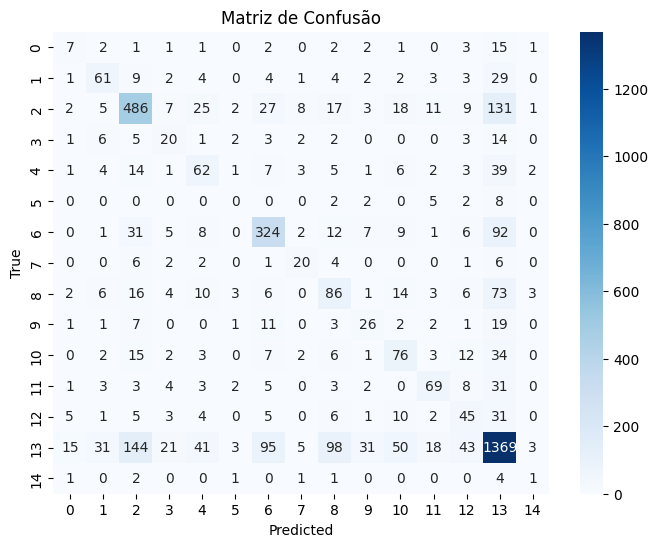

In [388]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [389]:
# dict(metadata.head(5))